In [1]:
MyData <- read.csv2(file="D:\\Daten\\DISS\\Daten\\Estrategias_Estudiantes_Kienberger_ber.csv", 
                    header=TRUE, sep=",", fileEncoding = "UTF-16", na.strings=c("NA","NaN", ""))

In [2]:
head(MyData,n = 3)

X,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,D.Q8b22c,D.Q9_1,D.Q9_2,E.T1,E.Q1,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed..442,porc_nan
0,R_1kOiXpqqaX3Irxm,Default Response Set,Anonymous,NA,NA,88.3.172.215,0,2017-11-09 13:10:29,2017-11-09 13:25:39,...,NA,NA,1.0,1,Gratificante y útil,40.968795776367,-5.6638946533203,-1,NA,71.84684684684684
1,R_1F5FzvY7aYwiipy,Default Response Set,Anonymous,NA,NA,212.128.135.110,0,2017-11-10 01:39:27,2017-11-10 01:54:25,...,NA,NA,1.0,1,Una encuesta muy completa que me ha servido para reflexionar sobre mis estrategias a la hora de comprender palabras desconocidas en alemán y a incluir nuevas. / Enhorabuena.,40.96809387207,-5.6620025634766,-1,NA,70.27027027027027
2,R_2ErWjTyNYcSh10N,Default Response Set,Anonymous,NA,NA,212.128.135.84,0,2017-11-10 02:23:28,2017-11-10 02:39:04,...,NA,NA,1.0,1,NA,40.96809387207,-5.6620025634766,-1,NA,70.72072072072072


In [3]:
dim(MyData)

[1]  67 445

zeigt Dimensionen = Zahl der Zeilen + Spalten an

In [4]:
colnames(MyData)[22:28]

[1] "A_Q2_1" "A_Q2_2" "A_Q2_3" "A_Q2_4" "A_Q2_5" "A_Q2_6" "A_Q2_7"

gibt Namen der Spalten eines Datensets an, von Zeile ... bis ...

### Likert-Variablen auswählen

Spalten, die Likert-Items enthalten, werden ausgewählt und in Vektoren zusammengefasst

* <- entspricht =, d. h. Zuweisung, Definition
* for (... in ...){ ...} (Wichtig: Klammern richtig setzen, keine vergessen)
* if (...) (hier Konditionen eingeben, mehrere durch Komma trennen) {...} (hier eingeben, was gemacht werden soll - in diesem Beispiel etwas hinzufügen, wenn eine bestimmte Kondition zutrifft)
* c() = leerer Vektor (so wie in Python [] für Listen)

In [5]:
get_vec <- function(df,name){
    vec <- c()
    for (i in 1:ncol(df)){
        if (grepl(name, colnames(df)[i]) & !grepl("TEXT",colnames(df)[i]) ){
            vec <- c(vec, i)
        }
    }
    vec
}

In [6]:
vec_AQ2 <- get_vec(MyData,"A_Q2")
vec_AQ3 <- get_vec(MyData,"A_Q3")
vec_CQ1 <- get_vec(MyData,"C_Q1")

In [7]:
vec_ACQ <- c(vec_AQ2,vec_AQ3,vec_CQ1)

In [8]:
colnames(MyData)[vec_ACQ]

[1] "A_Q2_1"  "A_Q2_2"  "A_Q2_3"  "A_Q2_4"  "A_Q2_5"  "A_Q2_6"  "A_Q2_7" 
 [8] "A_Q3_1"  "A_Q3_2"  "A_Q3_3"  "A_Q3_4"  "A_Q3_5"  "A_Q3_6"  "A_Q3_7" 
[15] "A_Q3_8"  "A_Q3_9"  "A_Q3_10" "A_Q3_30" "A_Q3_11" "A_Q3_12" "A_Q3_13"
[22] "A_Q3_14" "A_Q3_31" "A_Q3_15" "A_Q3_16" "A_Q3_17" "A_Q3_18" "A_Q3_19"
[29] "A_Q3_20" "A_Q3_21" "A_Q3_22" "A_Q3_23" "A_Q3_24" "A_Q3_25" "A_Q3_26"
[36] "A_Q3_27" "A_Q3_32" "A_Q3_33" "A_Q3_28" "A_Q3_29" "C_Q1_1"  "C_Q1_2" 
[43] "C_Q1_3"  "C_Q1_4"  "C_Q1_5"  "C_Q1_6"  "C_Q1_7"  "C_Q1_8"  "C_Q1_9" 
[50] "C_Q1_10" "C_Q1_11"

#### Funktion für Datenformat (Integer)

In [15]:
convert_data <- function(df,cols){
    X <- df[,cols]
    X <- do.call(cbind.data.frame,lapply(X,function(x) as.integer(as.character(x))))
    colnames(X) <- colnames(df)[cols]
    X
}

### Deskriptive Analyse

In [9]:
library("psych")

In [10]:
describe(MyData[vec_AQ2])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
A_Q2_1,1,67,2.447761,1.0629231,2,2.381818,1.4826,1,5,4,0.4700525,-0.3355793,0.12985672
A_Q2_2,2,67,3.552239,0.7443440,4,3.563636,1.4826,2,5,3,-0.1760789,-0.3450153,0.09093609
A_Q2_3,3,67,4.134328,0.8685677,4,4.218182,1.4826,2,5,3,-0.6657407,-0.4485494,0.10611243
A_Q2_4,4,67,4.313433,0.8740182,5,4.418182,0.0000,1,5,4,-1.1729583,1.2052960,0.10677831
A_Q2_5,5,67,3.283582,1.0560930,3,3.345455,1.4826,1,5,4,-0.5721445,-0.1412295,0.12902230
A_Q2_6,6,67,3.000000,1.3257359,3,3.000000,1.4826,1,5,4,-0.0384331,-1.1059861,0.16196442
A_Q2_7,7,67,4.283582,0.9817420,5,4.454545,0.0000,1,5,4,-1.3351726,1.0792439,0.11993887


In [11]:
describe(MyData[vec_AQ3])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
A_Q3_1,1,67,3.059701,1.1399176,3,3.072727,1.4826,1,5,4,0.006303073,-0.77228797,0.13926309
A_Q3_2*,2,66,4.060606,0.9426442,4,4.185185,1.4826,1,5,4,-0.986136886,0.64490659,0.11603148
A_Q3_3*,3,65,2.953846,1.4623480,3,2.943396,1.4826,1,5,4,0.019464360,-1.41215476,0.18138194
A_Q3_4,4,67,4.208955,0.9619632,4,4.363636,1.4826,1,5,4,-1.222246164,0.98794741,0.11752251
A_Q3_5,5,67,3.223881,1.1783514,3,3.254545,1.4826,1,5,4,-0.157835412,-0.96579038,0.14395853
A_Q3_6,6,67,2.970149,1.2669475,3,2.963636,1.4826,1,5,4,0.054963146,-1.13281055,0.15478228
A_Q3_7,7,67,3.940299,0.9981892,4,4.036364,1.4826,2,5,3,-0.513345084,-0.88887243,0.12194822
A_Q3_8,8,67,4.000000,1.0444659,4,4.127273,1.4826,1,5,4,-0.707352863,-0.44154229,0.12760182
A_Q3_9,9,67,3.970149,1.1277512,4,4.127273,1.4826,1,5,4,-1.003986622,0.21136754,0.13777673
A_Q3_10,10,67,4.313433,0.8911850,5,4.454545,0.0000,2,5,3,-1.146128430,0.39784093,0.10887558


In [12]:
describe(MyData[vec_CQ1])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
C_Q1_1,1,67,3.820896,0.8151106,4,3.854545,1.4826,2,5,3,-0.3321907,-0.4014233,0.09958161
C_Q1_2,2,67,4.522388,0.6822025,5,4.636364,0.0000,2,5,3,-1.3486447,1.5248162,0.08334430
C_Q1_3,3,67,3.686567,1.1442737,4,3.763636,1.4826,1,5,4,-0.3952654,-0.8786803,0.13979528
C_Q1_4,4,67,4.253731,0.8042177,4,4.363636,1.4826,1,5,4,-1.3368140,2.7629668,0.09825083
C_Q1_5,5,67,4.447761,0.7644285,5,4.563636,0.0000,2,5,3,-1.1300700,0.2995732,0.09338981
C_Q1_6,6,67,4.567164,0.7011653,5,4.690909,0.0000,2,5,3,-1.7939623,3.3257190,0.08566097
C_Q1_7,7,67,4.194030,0.9250521,4,4.309091,1.4826,2,5,3,-0.8364918,-0.3792069,0.11301310
C_Q1_8,8,67,2.537313,1.1848585,2,2.454545,1.4826,1,5,4,0.4508764,-0.6833641,0.14475350
C_Q1_9,9,67,4.373134,0.7752970,5,4.490909,0.0000,2,5,3,-1.1174109,0.7440720,0.09471761
C_Q1_10,10,67,2.208955,1.1617296,2,2.090909,1.4826,1,5,4,0.7382389,-0.4129493,0.14192785


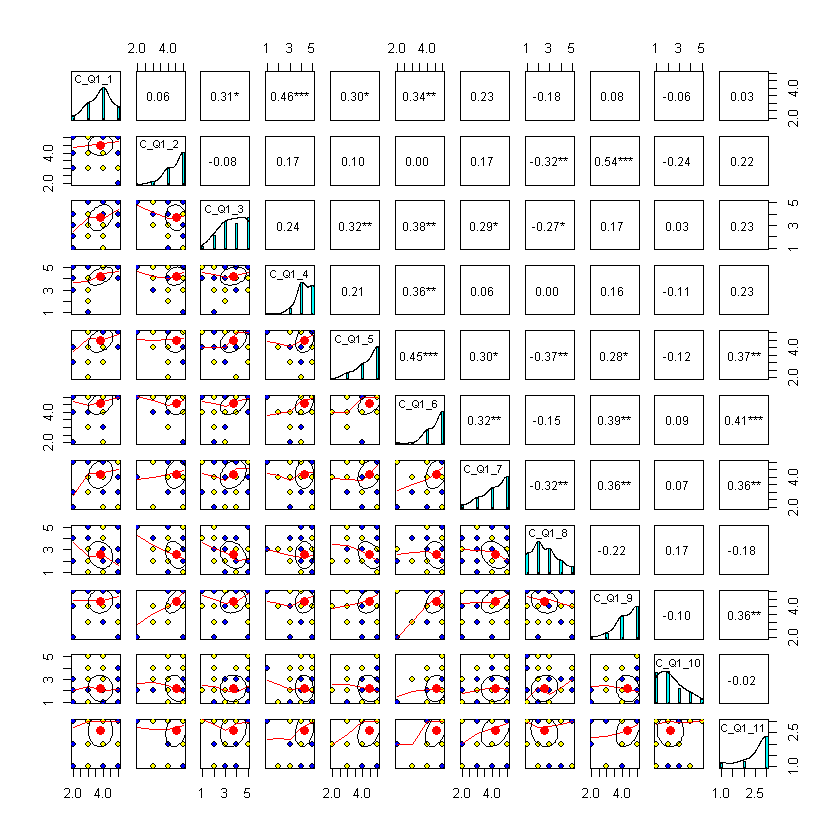

In [13]:
pairs.panels(MyData[vec_CQ1],bg=c("yellow","blue"),pch=21,stars=TRUE)

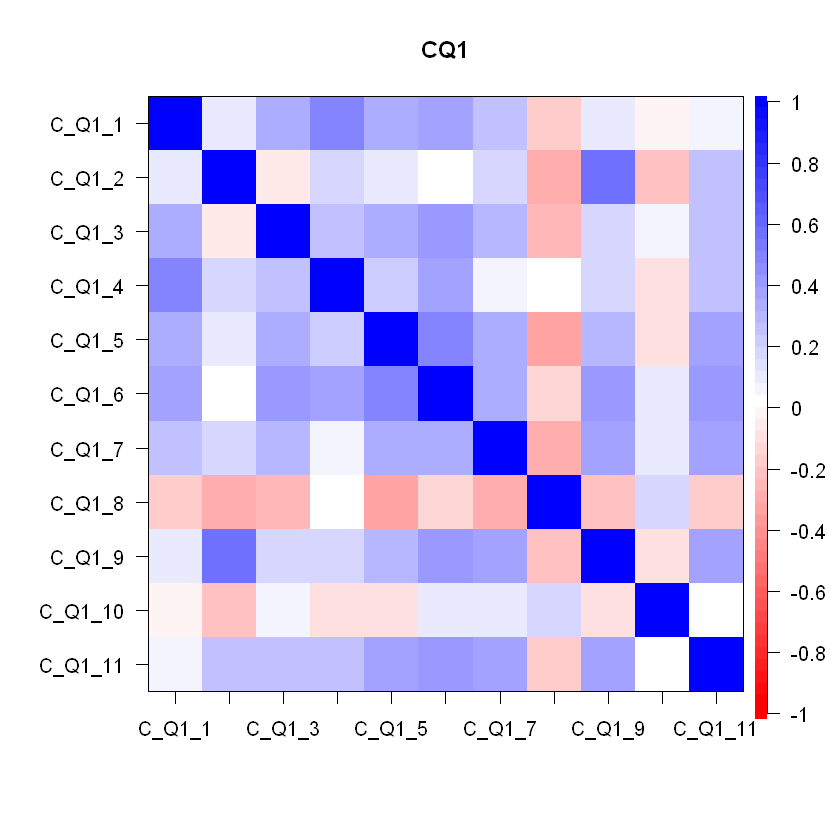

In [20]:
 corPlot(convert_data(MyData,vec_CQ1),main='CQ1')

### Explorative Faktorenanalyse

Parallel analysis suggests that the number of factors =  8  and the number of components =  3 


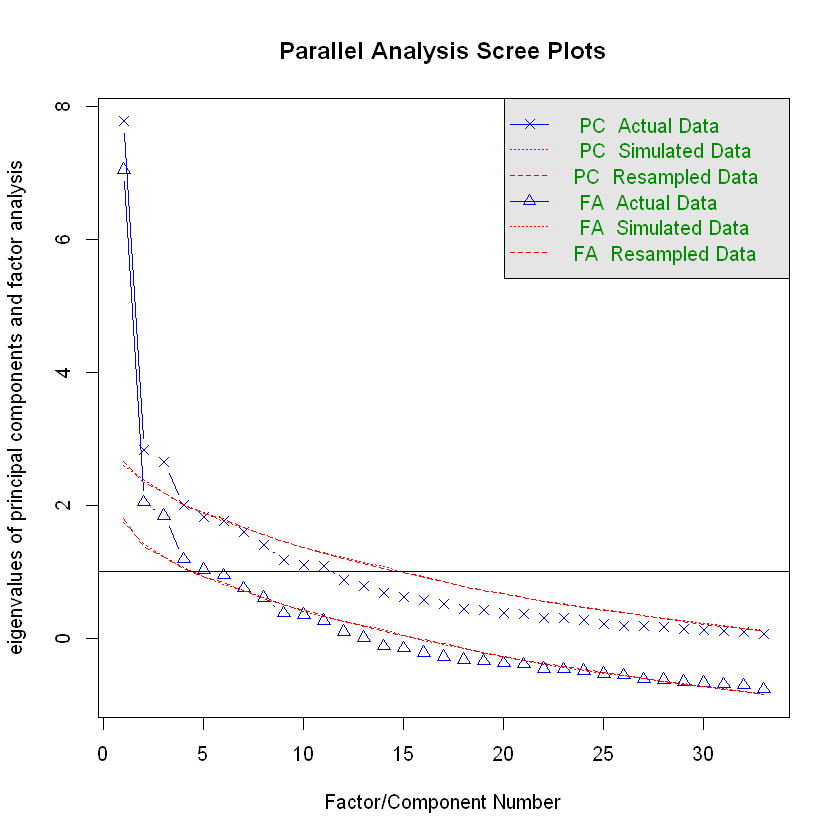

In [17]:
items.parallel <- fa.parallel(convert_data(MyData,c(vec_AQ3)), fa="both")

Test mit Itemgruppe AQ2+AQ3 ergibt 9 Faktoren, 3 Komponenten; in der Faktorenanalyse zeigt sich allerdings, dass diese kombinierte Analyse zu keinen sinnvollen Ergebnissen führt -> nur AQ3 analysieren

### Faktorenanalyse

Tests mit Itemgruppen AQ2 und CQ1 haben gezeigt, dass für diese die Anwendung einer Faktorenanalyse nicht sinnvoll ist - weder in der jeweiligen Gruppe noch in Kombination (es ist sinnvoll, diese Teile in der Befragung zu trennen und auch getrennt zu analysieren)

(Formeln/Programme beinhalten schon Kontrolle, ob Faktorenanalyse sinnvoll durchgeführt werden kann; ev. Bsp. nennen?; Alternative: unabhängig Kaiser-Meyer-Olkin(KMO) measure of sample adequacy durchführen)

Test für 7 Faktoren wie vorgeschlagen ergibt weniger sinnvolle Faktorengruppen als mit 8 Faktoren

* FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 7, rotate = "varimax")
* plot(FA_AQ3) (zum Darstellen, diagram(FA_AQ3) aber sinnvoller)

neuerlich Parallel Analysis laufen lassen (vgl. oben) ergibt doch 8 Faktoren (? - aber umso besser!)

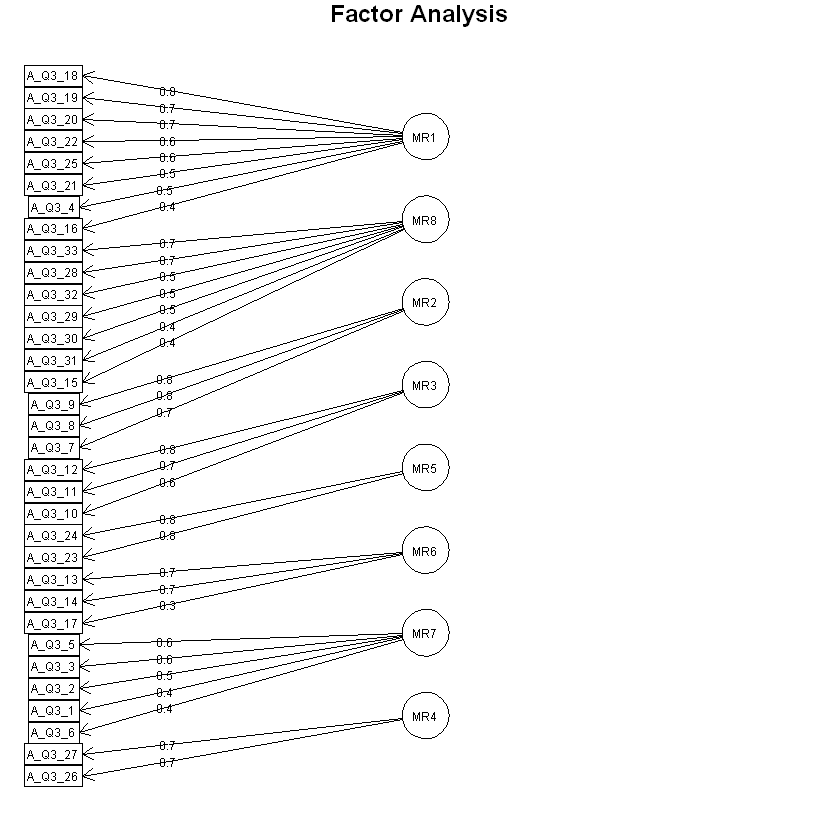

In [21]:
FA_AQ3 <- fa(convert_data(MyData,vec_AQ3), nfactors = 8, rotate = "varimax")
diagram(FA_AQ3)

### Hypothese zum Ergebnis der explorativen Faktorenanalyse:

* MR1: Kontextwissen (Textsorte, behandeltes Thema, kulturelles Wissen...)
* MR2: Wortbildung, morphosyntaktische Regularitäten
* MR3: Syntax, Orthographie
* MR4: Internet
* MR5: Bilder, Grafiken, Symbole, Zahlen
* MR6: semantische Relationen
* MR7: Sprachenvergleich (! Individuen können aufgrund ihrer Vorkenntnisse Strategien unterschiedlich gut nützen)
* MR8: metakognitive Strategien

In [22]:
FA_AQ3

Factor Analysis using method =  minres
Call: fa(r = convert_data(MyData, vec_AQ3), nfactors = 8, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
          MR1   MR8   MR2   MR3   MR5   MR6   MR7   MR4   h2   u2 com
A_Q3_1   0.29 -0.14  0.09  0.40  0.07  0.15  0.41  0.08 0.47 0.53 3.6
A_Q3_2   0.23  0.06  0.30  0.07  0.12  0.00  0.47  0.32 0.48 0.52 3.4
A_Q3_3   0.13 -0.10  0.00 -0.12  0.30  0.11  0.59 -0.08 0.50 0.50 1.9
A_Q3_4   0.46  0.18  0.09  0.21  0.14 -0.11  0.23  0.39 0.54 0.46 3.8
A_Q3_5   0.05  0.26  0.00  0.00  0.05 -0.03  0.62  0.20 0.49 0.51 1.6
A_Q3_6   0.28  0.10  0.22  0.18 -0.31  0.11  0.36  0.17 0.44 0.56 5.2
A_Q3_7   0.00  0.10  0.74  0.18 -0.15  0.05  0.06  0.05 0.62 0.38 1.3
A_Q3_8   0.14  0.15  0.77  0.30  0.07  0.19  0.11 -0.12 0.79 0.21 1.7
A_Q3_9   0.09  0.21  0.82  0.14 -0.03  0.02  0.01  0.06 0.76 0.24 1.2
A_Q3_10  0.09  0.00  0.31  0.56  0.11 -0.06  0.09  0.08 0.45 0.55 1.8
A_Q3_30  0.22  0.48  0.25  0.12 -0.03  0.27 

### GRM

In [23]:
IRT_AQ3 <- irt.fa(convert_data(MyData,vec_AQ3),nfactors = 8,rotate = "varimax", plot = FALSE)

Warning message in matpLower(x, nvar, gminx, gmaxx, gminy, gmaxy):
"528 cells were adjusted for 0 values using the correction for continuity. Examine your data carefully."

In [24]:
IRT_AQ3

Item Response Analysis using Factor Analysis  

Call: irt.fa(x = convert_data(MyData, vec_AQ3), nfactors = 8, plot = FALSE, 
    rotate = "varimax")

Factor analysis with Call: fa(r = r, nfactors = nfactors, n.obs = n.obs, rotate = rotate, 
    fm = fm)

Test of the hypothesis that 8 factors are sufficient.
The degrees of freedom for the model is 292  and the objective function was  2.9 
The number of observations was  67  with Chi Square =  141.55  with prob <  1 

The root mean square of the residuals (RMSA) is  0.04 
The df corrected root mean square of the residuals is  0.05 

Tucker Lewis Index of factoring reliability =  2.38
RMSEA index =  0  and the 10 % confidence intervals are  0 0
BIC =  -1086.22

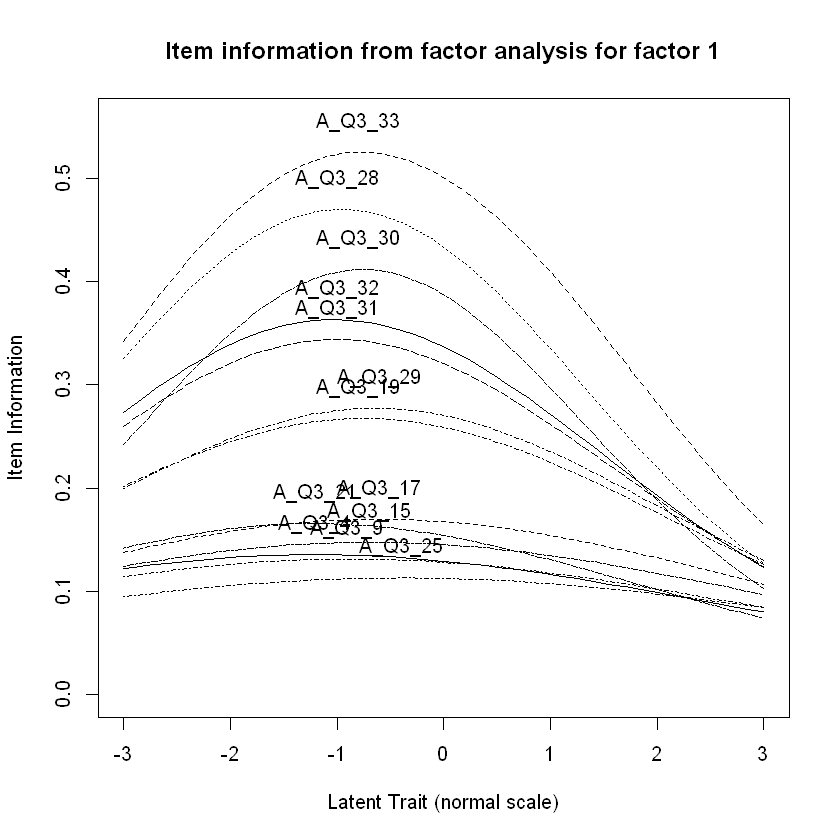

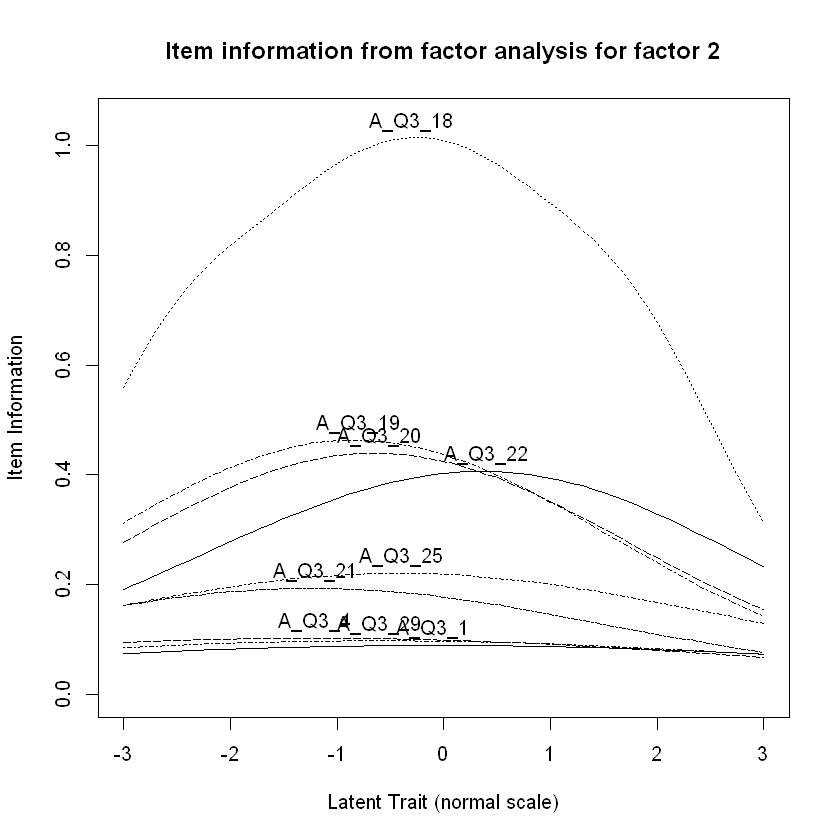

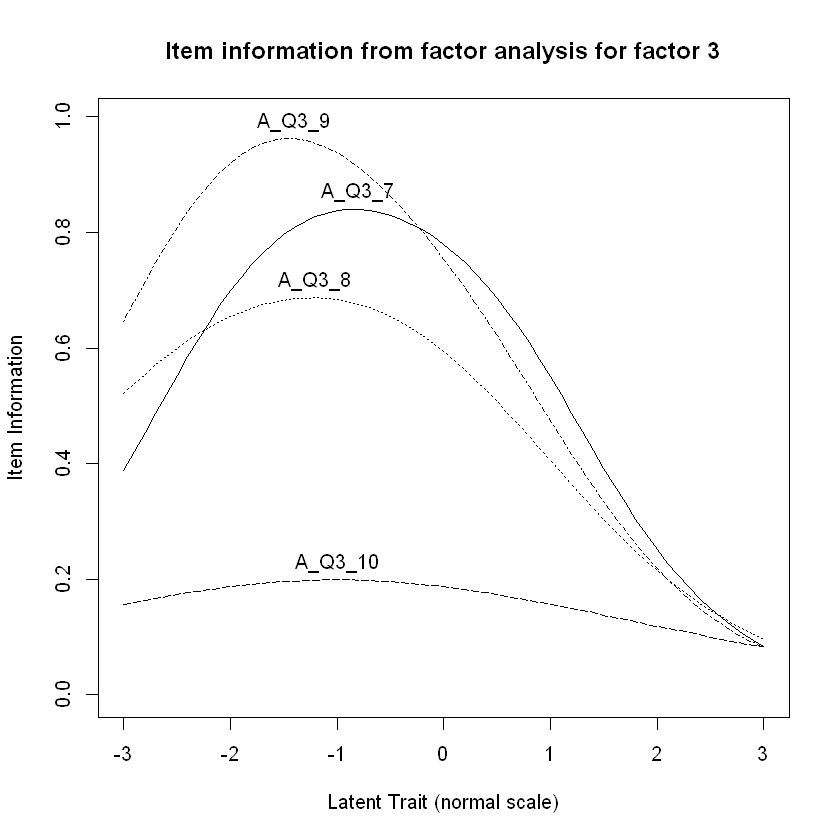

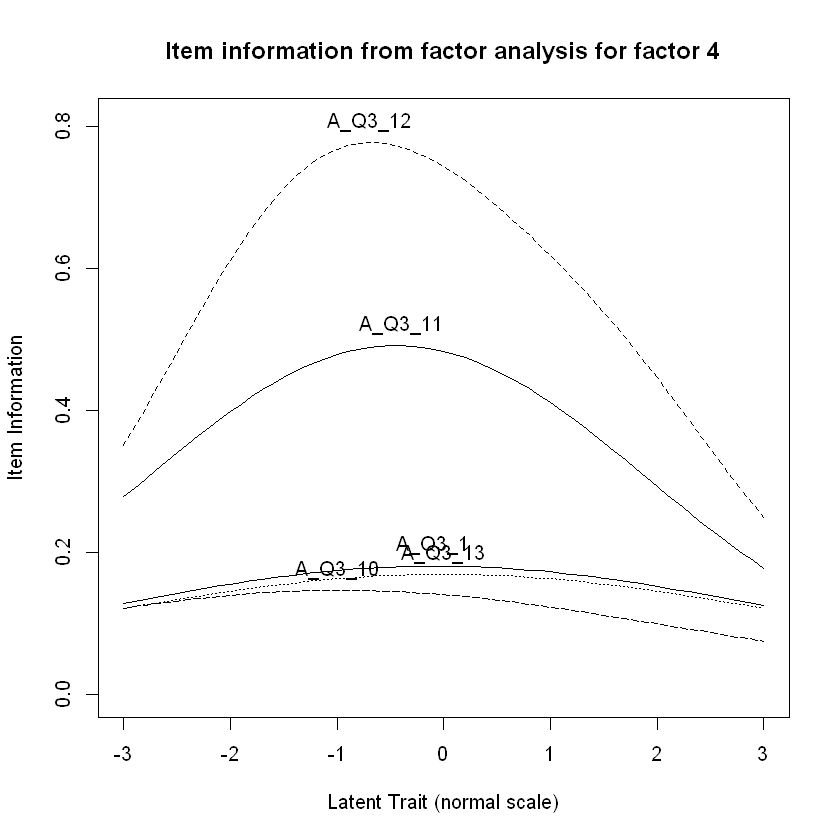

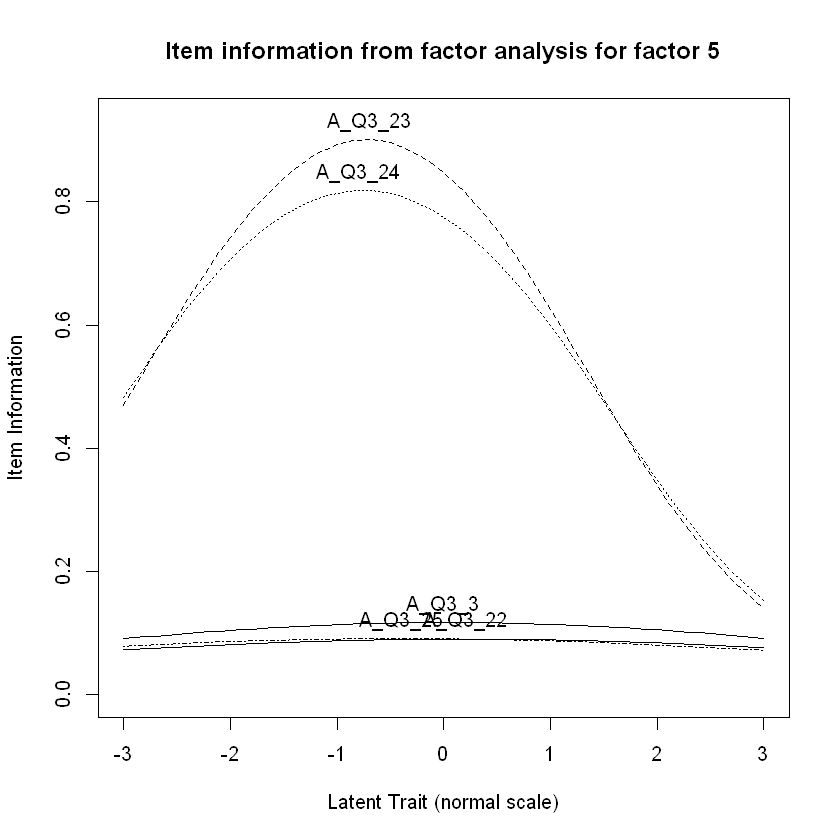

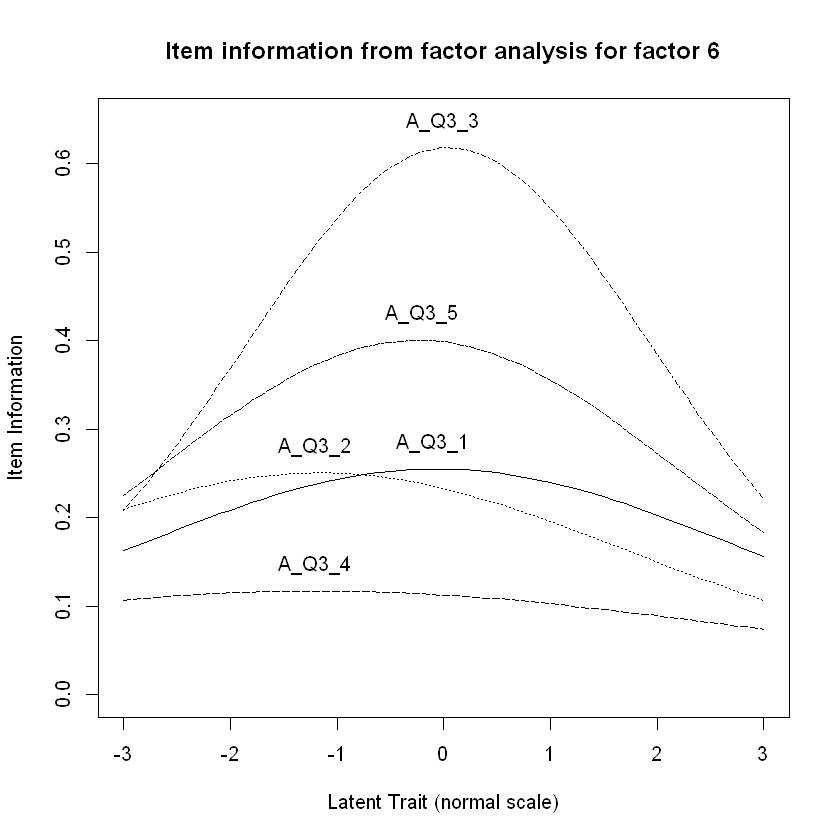

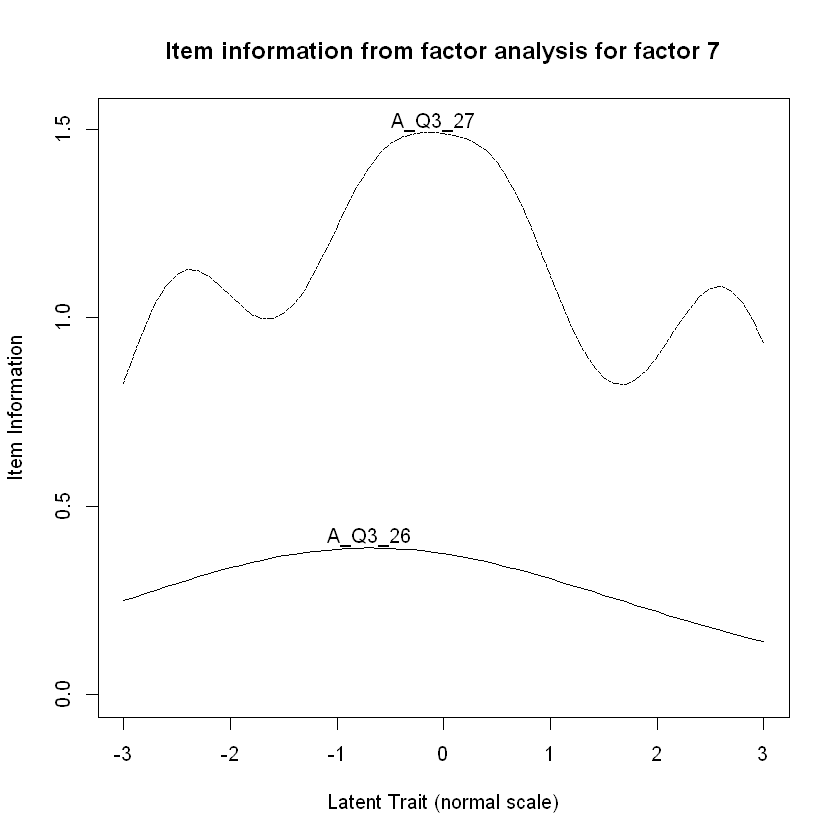

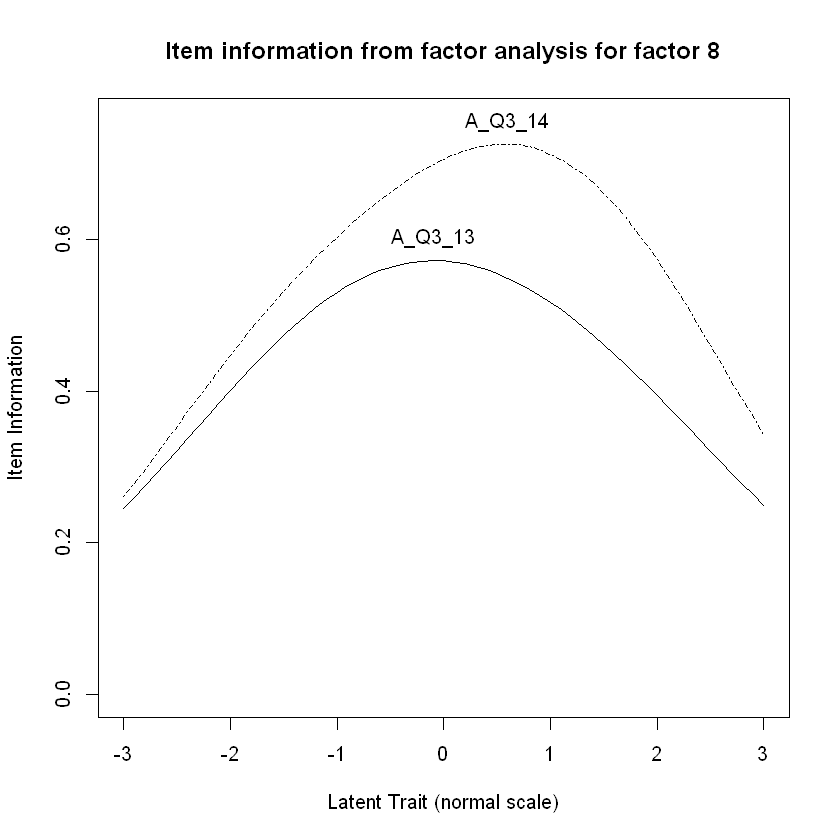

In [25]:
plot(IRT_AQ3)

In [26]:
library("ltm")

Loading required package: MASS
Loading required package: msm
Loading required package: polycor

Attaching package: 'polycor'

The following object is masked from 'package:psych':

    polyserial


Attaching package: 'ltm'

The following object is masked from 'package:psych':

    factor.scores



In [27]:
matrix_AQ3 <- convert_data(MyData,vec_AQ3)

In [28]:
get_fitems <- function(F,f,thr){
    names(F$loadings[F$loadings[,f] > thr, f])
}

In [29]:
get_datagrm <- function(df,F,f,thr){
    data.frame(apply(df[get_fitems(F,f,thr)],2,as.factor))
}

### GRM-Funktion

In [70]:
grm_full <- function (df,F,f,thr){
    results <- list()
    results$rcor <- rcor.test(get_datagrm(df,F,f,thr), method = "kendall")
    results$fit1 <- grm(get_datagrm(df,F,f,thr), constrained = TRUE)
    results$fit2 <- grm(get_datagrm(df,F,f,thr), constrained = FALSE)
    results$anova <- anova(results$fit1,results$fit2)
    results$margins1 <- margins(results$fit1)
    results$margins2 <- margins(results$fit2)
    results$info1 <- information(results$fit1, c(-4, 4))
    results$info2 <- information(results$fit2, c(-4, 4))
    results
}

#### GRM MR1

In [72]:
GRM_AQ3_MR1 <- grm_full(MyData,FA_AQ3,'MR1',0.3)

In [73]:
GRM_AQ3_MR1$rcor


        A_Q3_4 A_Q3_16 A_Q3_18 A_Q3_19 A_Q3_20 A_Q3_21 A_Q3_22 A_Q3_25
A_Q3_4   *****  0.288   0.356   0.361   0.380   0.230   0.250   0.325 
A_Q3_16  0.007  *****   0.206   0.302   0.297   0.047   0.154   0.205 
A_Q3_18  0.001  0.045   *****   0.508   0.492   0.389   0.553   0.317 
A_Q3_19  0.001  0.004  <0.001   *****   0.547   0.414   0.446   0.464 
A_Q3_20 <0.001  0.004  <0.001  <0.001   *****   0.442   0.397   0.325 
A_Q3_21  0.038  0.669  <0.001  <0.001  <0.001   *****   0.293   0.317 
A_Q3_22  0.019  0.142  <0.001  <0.001  <0.001   0.007   *****   0.504 
A_Q3_25  0.002  0.049   0.002  <0.001   0.001   0.003  <0.001   ***** 

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


Korrelation (non parametric) -> oben rechts; unten links p-values (non parametric correlations sinnvoller für ordinale/graduale Werte)

In [74]:
GRM_AQ3_MR1$anova


 Likelihood Ratio Table
                 AIC     BIC log.Lik   LRT df p.value
results$fit1 1343.82 1414.37 -639.91                 
results$fit2 1341.49 1427.47 -631.75 16.33  7   0.022



Vergleich von Model1 und 2 (fit1, fit2): mit constrained true/false ->

constrained = assumes equal discrimination parameters across items ("items werden als unabhängig untereinander betrachtet" +/- Erklärung, aber nicht wiss so zu formulieren)

Model2 passt besser (p.value unter 0.05), daher wird im Weiteren damit gearbeitet (! nahe am P-Valor-Grenzwert)

wenn p.value über 0.05, sollten beide Modelle getestet werden

#### Grafiken zur Visualisierung

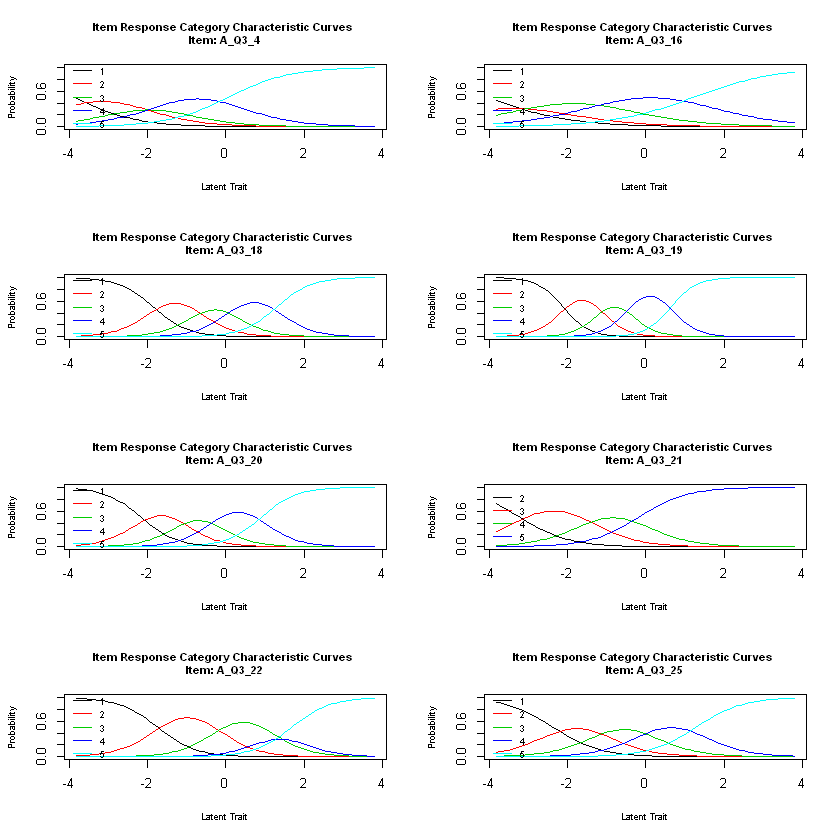

In [68]:
par(mfrow = c(4, 2))
plot(GRM_AQ3_MR1$fit2, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

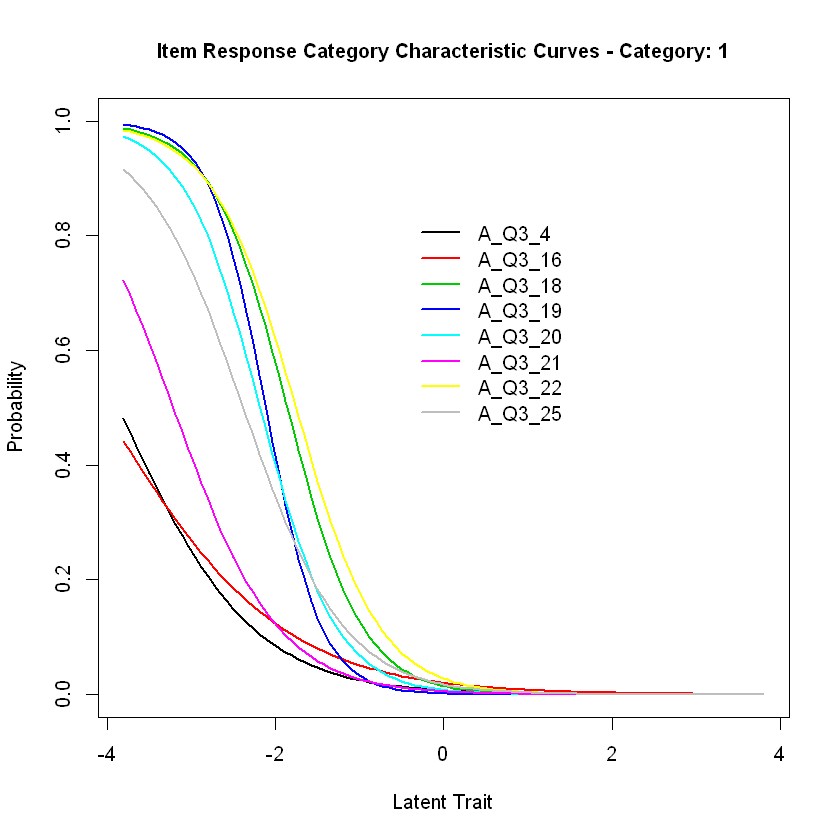

In [69]:
plot(GRM_AQ3_MR1$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [77]:
GRM_AQ3_MR1$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 43.01
Information in (-4, 4) = 41.25 (95.91%)
Based on all the items


In [80]:
information(GRM_AQ3_MR1$fit2, c(-4, 4), items = c(3:4))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 16.44
Information in (-4, 4) = 16.41 (99.8%)
Based on items 3, 4


In [81]:
16.41/43.01

[1] 0.3815392

In [86]:
information(GRM_AQ3_MR1$fit2, c(-4, 4), items = c(1:2))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 5.63
Information in (-4, 4) = 4.47 (79.28%)
Based on items 1, 2


In [78]:
5.63/43.01

[1] 0.1308998

Items A_Q3_4 und A_Q3_16 tragen nur wenig zum Informationsgehalt des Faktors bei.

#### GRM MR2

In [94]:
GRM_AQ3_MR2 <- grm_full(MyData,FA_AQ3,'MR2',0.6)

In [95]:
GRM_AQ3_MR2$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik  LRT df p.value
results$fit1 459.71 486.17 -217.86                
results$fit2 461.78 492.64 -216.89 1.94  2   0.379



Folgende Grafik zeigt bei Anwendung beider Modelle klares Bild -> klare Struktur

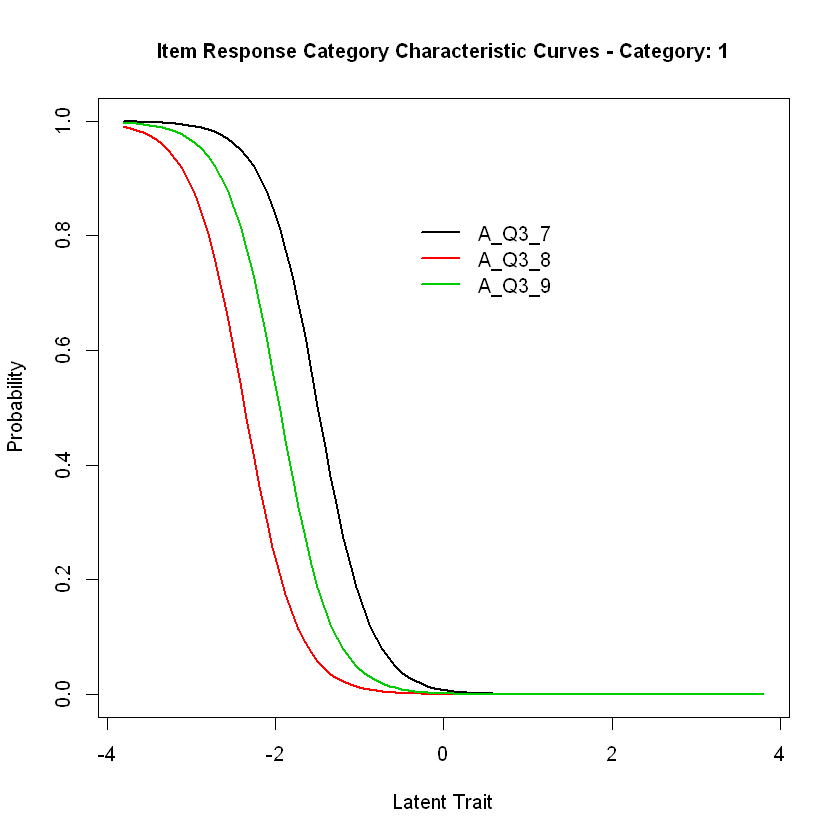

In [119]:
plot(GRM_AQ3_MR2$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

#### GRM MR3

In [97]:
GRM_AQ3_MR3 <- grm_full(MyData,FA_AQ3,'MR3',0.3)

In [98]:
GRM_AQ3_MR3$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik   LRT df p.value
results$fit1 927.84 971.93 -443.92                 
results$fit2 923.60 976.51 -437.80 12.24  4   0.016



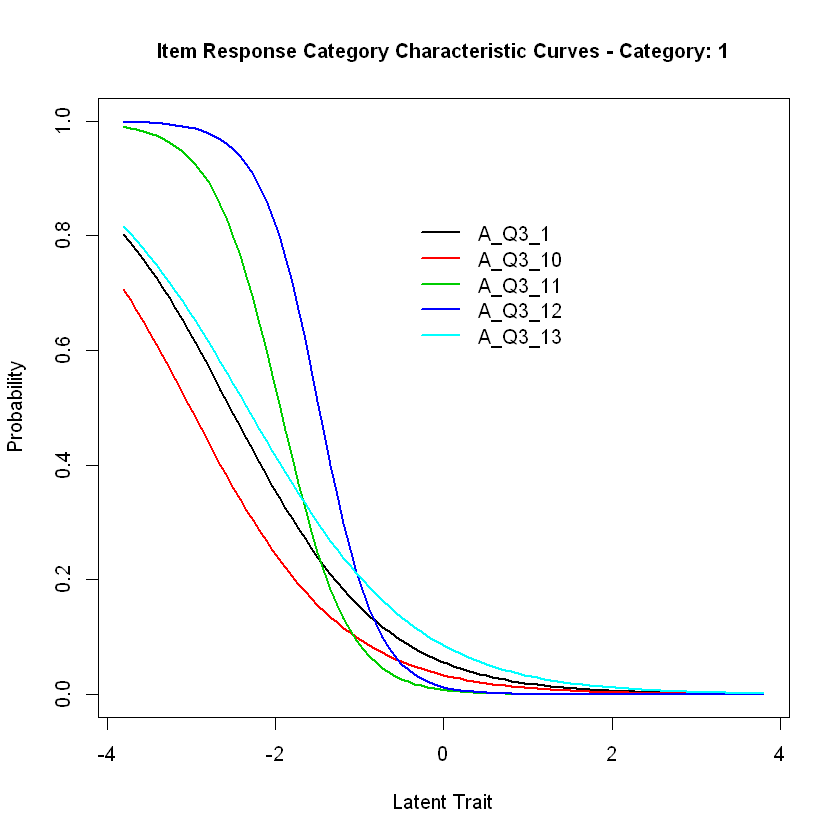

In [121]:
plot(GRM_AQ3_MR3$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [100]:
GRM_AQ3_MR3$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 24.45
Information in (-4, 4) = 23.48 (96.03%)
Based on all the items


In [114]:
information(GRM_AQ3_MR3$fit2, c(-4, 4), items = c(1:2,5))


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 7.63
Information in (-4, 4) = 6.68 (87.53%)
Based on items 1, 2, 5


In [115]:
7.63/24.45

[1] 0.3120654

A_Q3_1, A_Q3_10 und A_Q3_13 tragen 31% gesamt, einzeln jeweils ca. 10% zum Informationsgehalt bei.

#### GRM MR4

In [117]:
GRM_AQ3_MR4 <- grm_full(MyData,FA_AQ3,'MR4',0.3)

Faktorenanalyse schlägt 2 Items für diesen Faktor vor: A_Q3_26 und A_Q3_27; GRM wurde mit Grenzwert 0,3 durchgeführt, da 2 Items zu wenige für diese Art der Analyse sind -> 2 unpassende Items können unberücksichtigt bleiben. 

Analoges Vorgehen bei MR5!

In [118]:
GRM_AQ3_MR4$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik LRT df p.value
results$fit1 717.71 755.19 -341.85               
results$fit2 722.31 766.41 -341.16 1.4  3   0.707



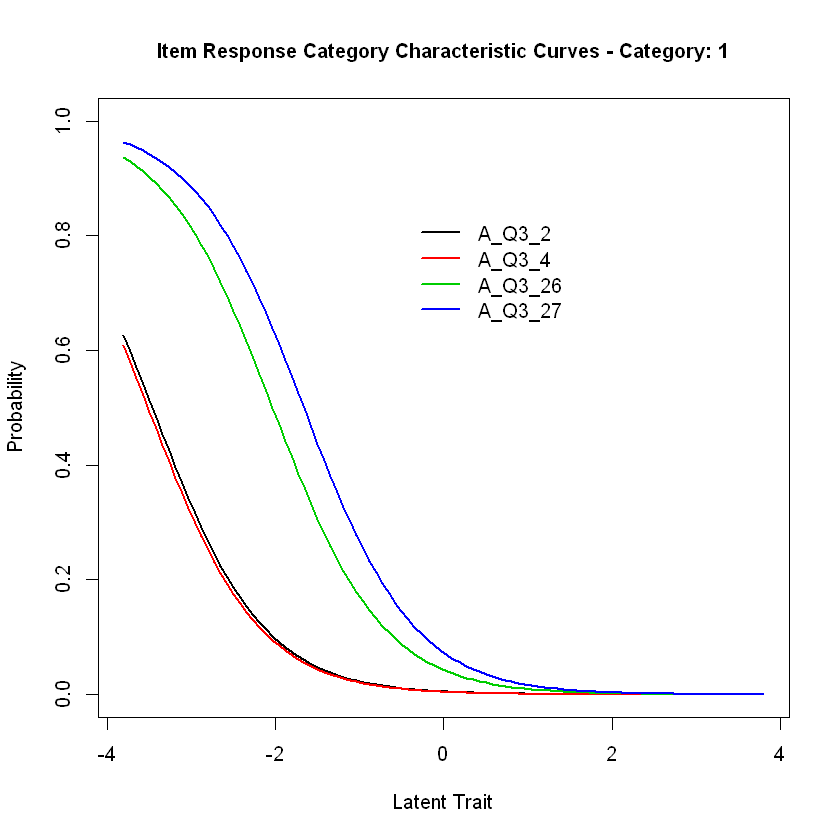

In [124]:
plot(GRM_AQ3_MR4$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

#### GRM MR5

In [126]:
GRM_AQ3_MR5 <- grm_full(MyData,FA_AQ3,'MR5',0.3)

In [128]:
GRM_AQ3_MR5$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik   LRT df p.value
results$fit1 781.54 819.02 -373.77                 
results$fit2 760.51 804.60 -360.25 27.03  3  <0.001



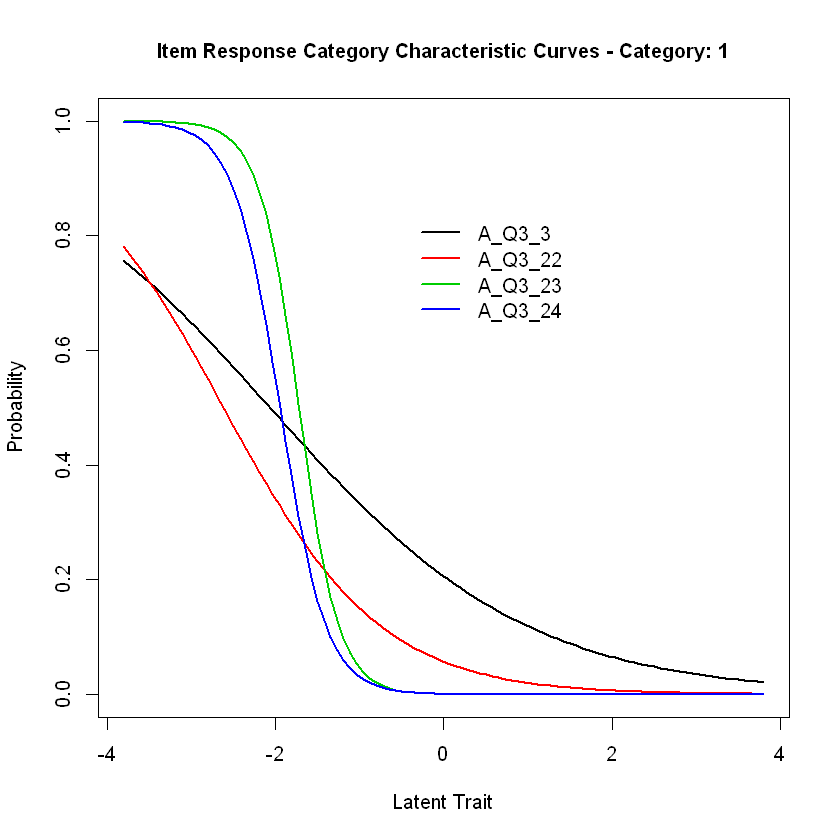

In [129]:
plot(GRM_AQ3_MR5$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

#### GRM MR6

In [130]:
GRM_AQ3_MR6 <- grm_full(MyData,FA_AQ3,'MR6',0.3)

In [131]:
GRM_AQ3_MR6$anova


 Likelihood Ratio Table
                AIC    BIC log.Lik  LRT df p.value
results$fit1 698.62 733.90 -333.31                
results$fit2 701.14 743.03 -331.57 3.48  3   0.323



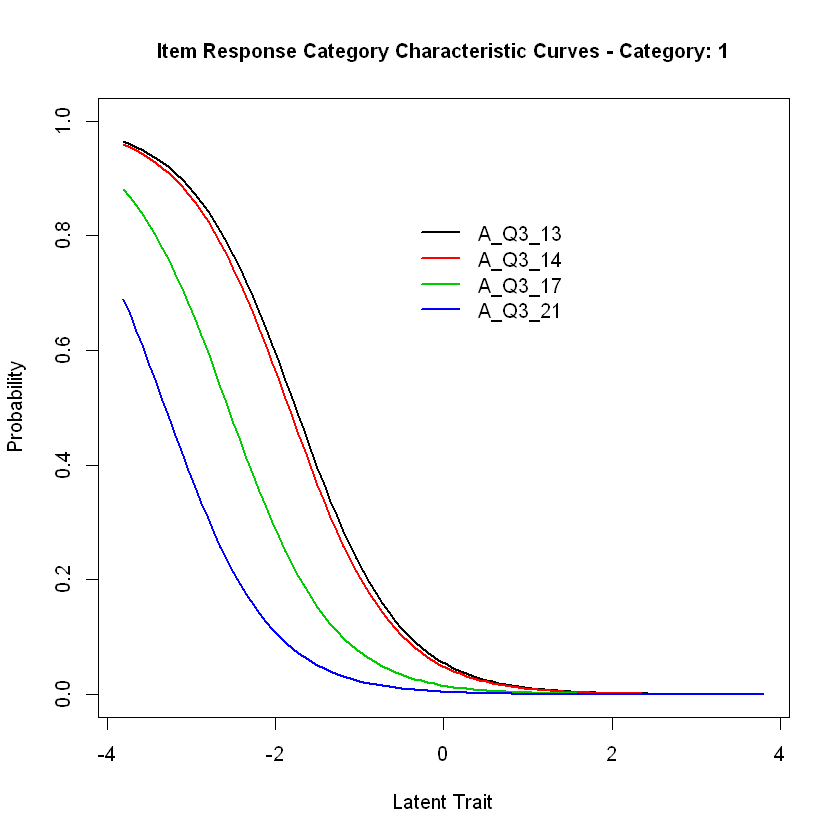

In [132]:
plot(GRM_AQ3_MR6$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

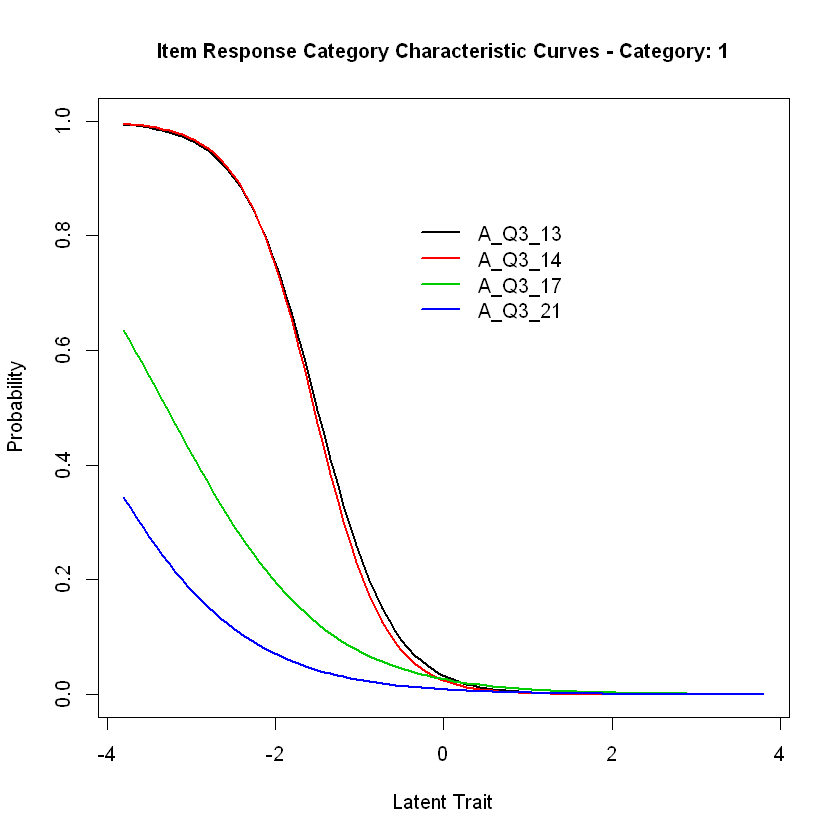

In [133]:
plot(GRM_AQ3_MR6$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [134]:
GRM_AQ3_MR6$info1


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 17.42
Information in (-4, 4) = 16.63 (95.49%)
Based on all the items


In [140]:
information(GRM_AQ3_MR6$fit1, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 3.88
Information in (-4, 4) = 3.48 (89.71%)
Based on items 4


In [141]:
3.88/17.42

[1] 0.2227325

In [135]:
GRM_AQ3_MR6$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 19.37
Information in (-4, 4) = 18.2 (93.92%)
Based on all the items


In [142]:
information(GRM_AQ3_MR6$fit2, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 2.45
Information in (-4, 4) = 1.77 (72.43%)
Based on items 4


In [143]:
2.45/19.37

[1] 0.1264843

Items A_Q3_17 und A_Q3_21 tragen relativ gesehen weniger zum Informationsgehalt des Faktors bei, allerdings doch so viel, dass sie nicht eindeutig eleminiert werden können. Inhaltlich gesehen erscheint es logisch, dass Item 17 (logische Zusammenhänge suchen) und Item 21 (Weltwissen etc) einen Zusammenhang mit semantischen Verbindungen aufweisen, diese Bindung aber schwächer im Vergleich zu den eindeutigen Items des Faktors ist. 

#### GRM MR7

In [144]:
GRM_AQ3_MR7 <- grm_full(MyData,FA_AQ3,'MR7',0.3)

In [145]:
GRM_AQ3_MR7$anova


 Likelihood Ratio Table
                AIC     BIC log.Lik  LRT df p.value
results$fit1 984.68 1030.98 -471.34                
results$fit2 984.22 1039.34 -467.11 8.46  4   0.076



In [159]:
GRM_AQ3_MR7$rcor


       A_Q3_1 A_Q3_2 A_Q3_3 A_Q3_5 A_Q3_6
A_Q3_1  *****     NA     NA  0.160  0.194
A_Q3_2 <0.001  *****     NA     NA     NA
A_Q3_3  0.003  0.037  *****     NA     NA
A_Q3_5  0.113 <0.001  0.011  *****  0.274
A_Q3_6  0.053  0.008  0.480  0.006  *****

upper diagonal part contains correlation coefficient estimates 
lower diagonal part contains corresponding p-values


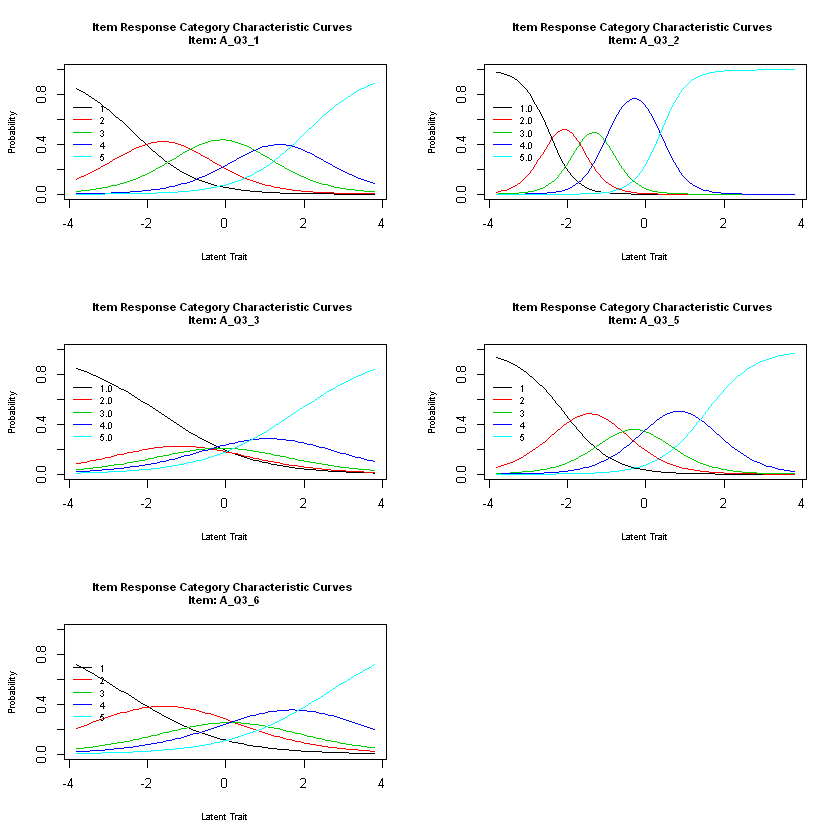

In [158]:
par(mfrow = c(3, 2))
plot(GRM_AQ3_MR7$fit2, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

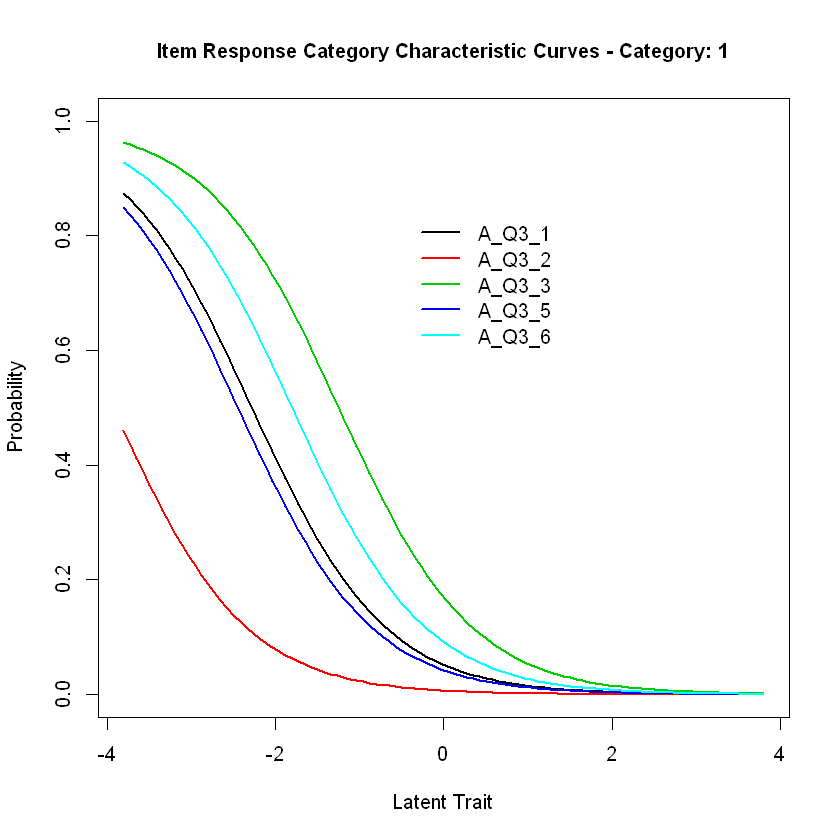

In [147]:
plot(GRM_AQ3_MR7$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

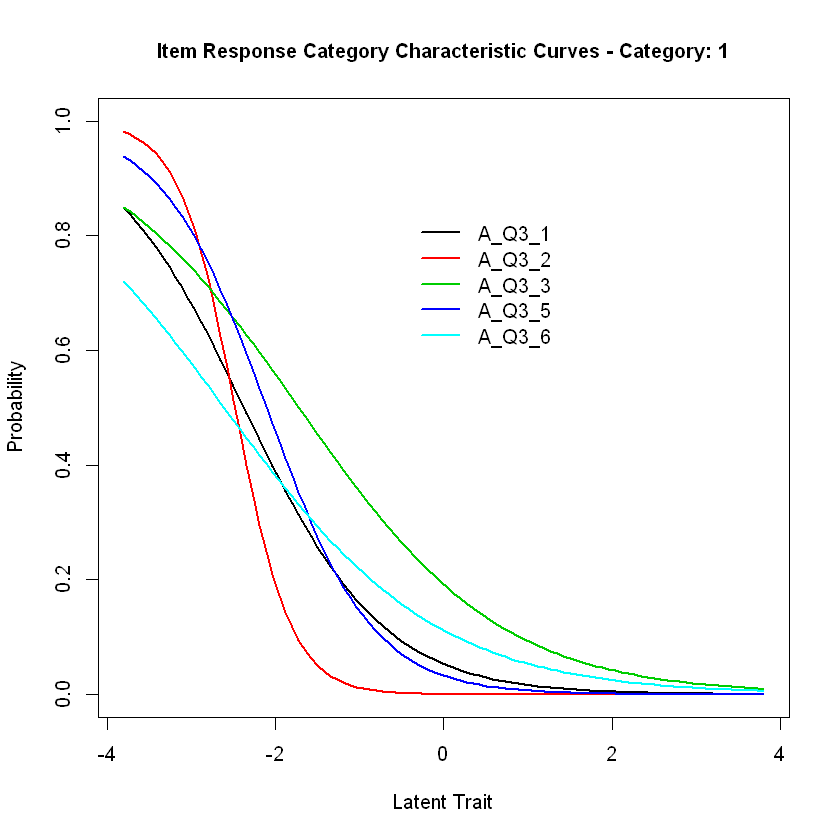

In [148]:
plot(GRM_AQ3_MR7$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [149]:
GRM_AQ3_MR7$info1


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 15.83
Information in (-4, 4) = 14.52 (91.73%)
Based on all the items


In [150]:
information(GRM_AQ3_MR7$fit1, c(-4, 4), items = 2)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 3.42
Information in (-4, 4) = 2.79 (81.41%)
Based on items 2


In [153]:
3.42/15.83

[1] 0.2160455

In [151]:
GRM_AQ3_MR7$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 20.53
Information in (-4, 4) = 19.53 (95.12%)
Based on all the items


In [152]:
information(GRM_AQ3_MR7$fit2, c(-4, 4), items = 2)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 9.54
Information in (-4, 4) = 9.51 (99.68%)
Based on items 2


In [154]:
9.54/20.53

[1] 0.4646858

#### GRM MR8

In [164]:
GRM_AQ3_MR8 <- grm_full(MyData,FA_AQ3,'MR8',0.39)

In [165]:
GRM_AQ3_MR8$anova


 Likelihood Ratio Table
                 AIC     BIC log.Lik   LRT df p.value
results$fit1 1396.48 1467.03 -666.24                 
results$fit2 1399.15 1485.14 -660.58 11.33  7   0.125



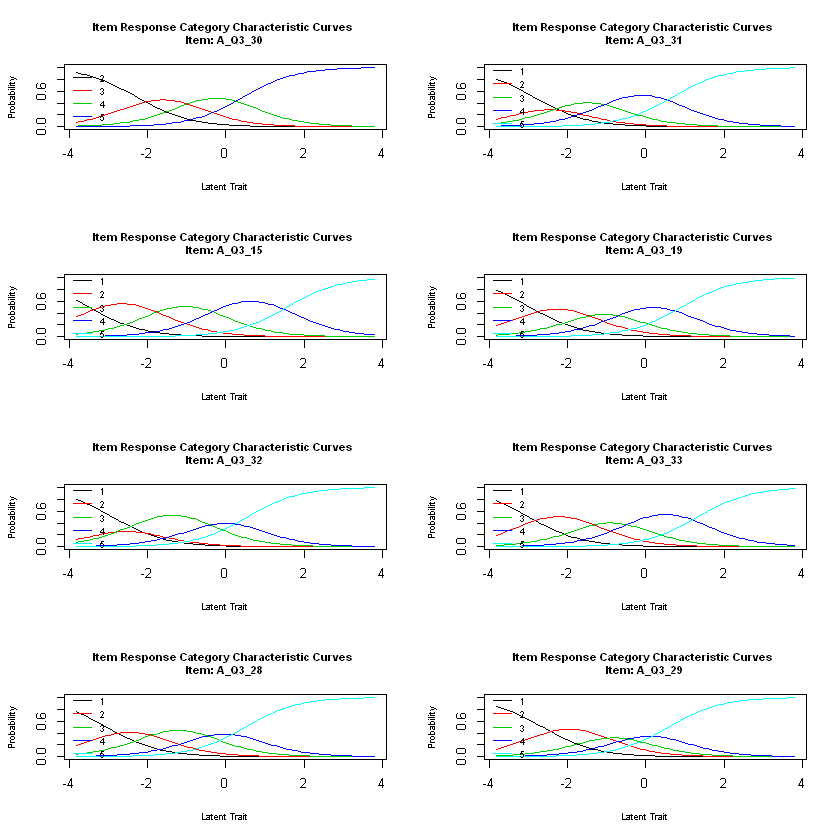

In [166]:
par(mfrow = c(4, 2))
plot(GRM_AQ3_MR8$fit1, lwd = 1, cex = 0.7, legend = TRUE, cx = "left",xlab = "Latent Trait", cex.main = 0.8, cex.lab = 0.7, cex.axis = 1)

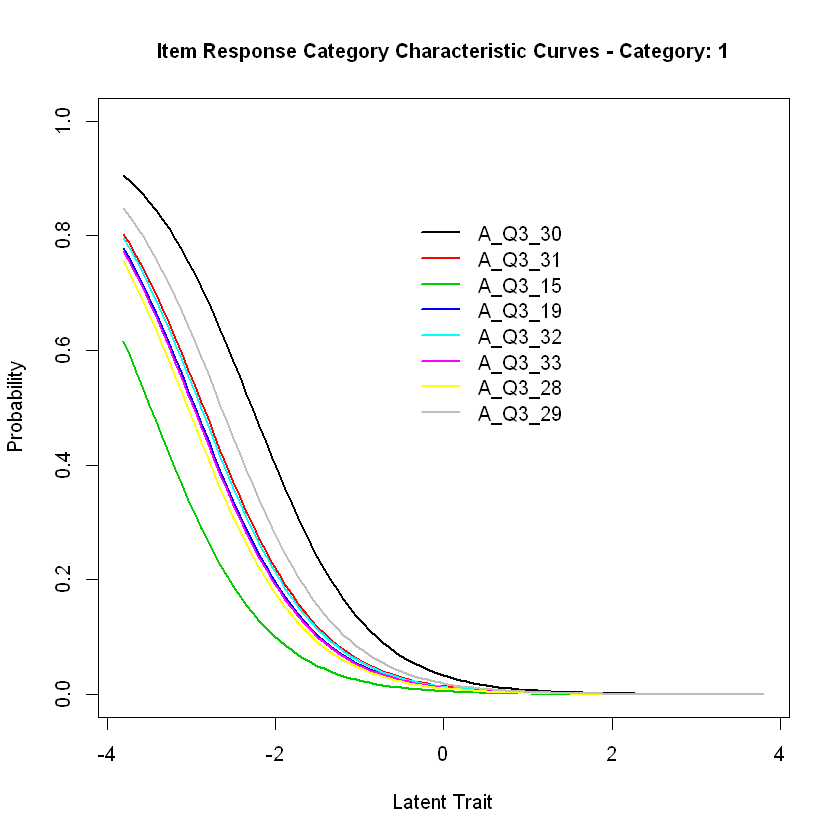

In [168]:
plot(GRM_AQ3_MR8$fit1, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

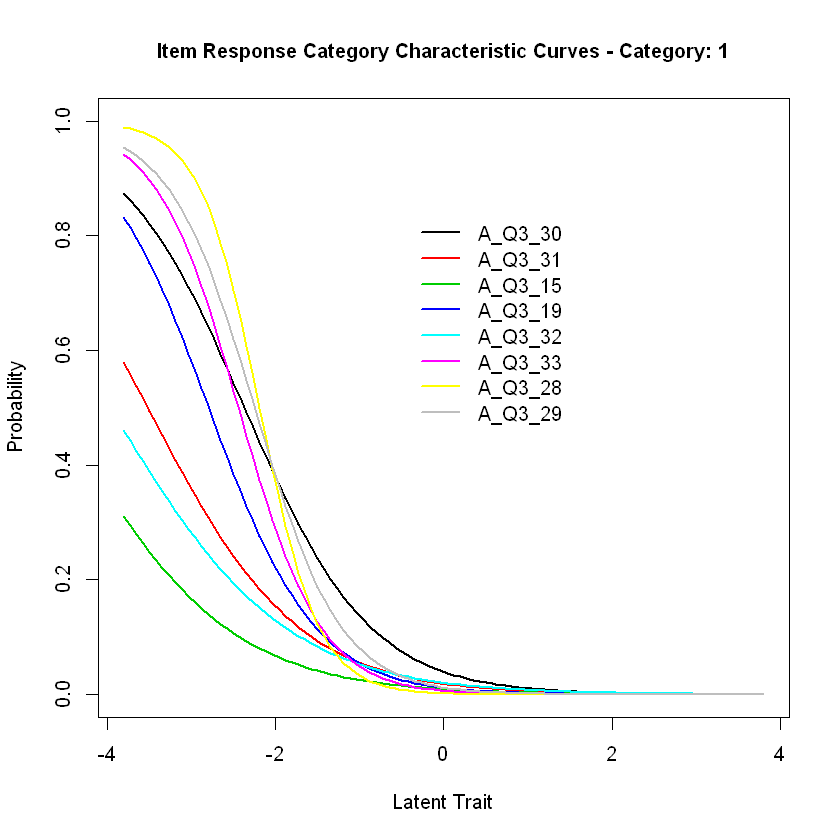

In [169]:
plot(GRM_AQ3_MR8$fit2, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)

In [172]:
GRM_AQ3_MR8$info1


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 31.06
Information in (-4, 4) = 28.9 (93.05%)
Based on all the items


In [175]:
information(GRM_AQ3_MR8$fit1, c(-4, 4), items = 3)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 4.56
Information in (-4, 4) = 4.05 (88.8%)
Based on items 3


In [179]:
information(GRM_AQ3_MR8$fit1, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = TRUE)

Total Information = 4.01
Information in (-4, 4) = 3.73 (93.16%)
Based on items 4


In [176]:
4.56/31.06

[1] 0.1468126

In [171]:
GRM_AQ3_MR8$info2


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 35.25
Information in (-4, 4) = 32.94 (93.46%)
Based on all the items


In [177]:
information(GRM_AQ3_MR8$fit2, c(-4, 4), items = 3)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 2.97
Information in (-4, 4) = 2.17 (73.09%)
Based on items 3


In [180]:
information(GRM_AQ3_MR8$fit2, c(-4, 4), items = 4)


Call:
grm(data = get_datagrm(df, F, f, thr), constrained = FALSE)

Total Information = 4.32
Information in (-4, 4) = 4.11 (95.03%)
Based on items 4


In [178]:
2.97/35.25

[1] 0.08425532

In [181]:
4.32/35.25

[1] 0.1225532

Items A_Q3_15 zeigt geringen Wert, trägt wenig zum Informationsgehalt des Faktors bei, ähnlich Item A_Q3_19. Beide haben auch inhaltlich wenig Übereinstimmung mit den anderen Items des Faktors (metakognitive Strategien).

#### GRM QC

In [42]:
testC <- data.frame(apply(MyData[,vec_CQ1],2,as.factor))

In [43]:
fit1_C <- grm(testC, constrained = TRUE)
fit2_C <- grm(testC, constrained = FALSE)

In [44]:
anova(fit1_C,fit2_C)


 Likelihood Ratio Table
           AIC     BIC log.Lik   LRT df p.value
fit1_C 1690.77 1772.34 -808.38                 
fit2_C 1628.52 1732.15 -767.26 82.24 10  <0.001



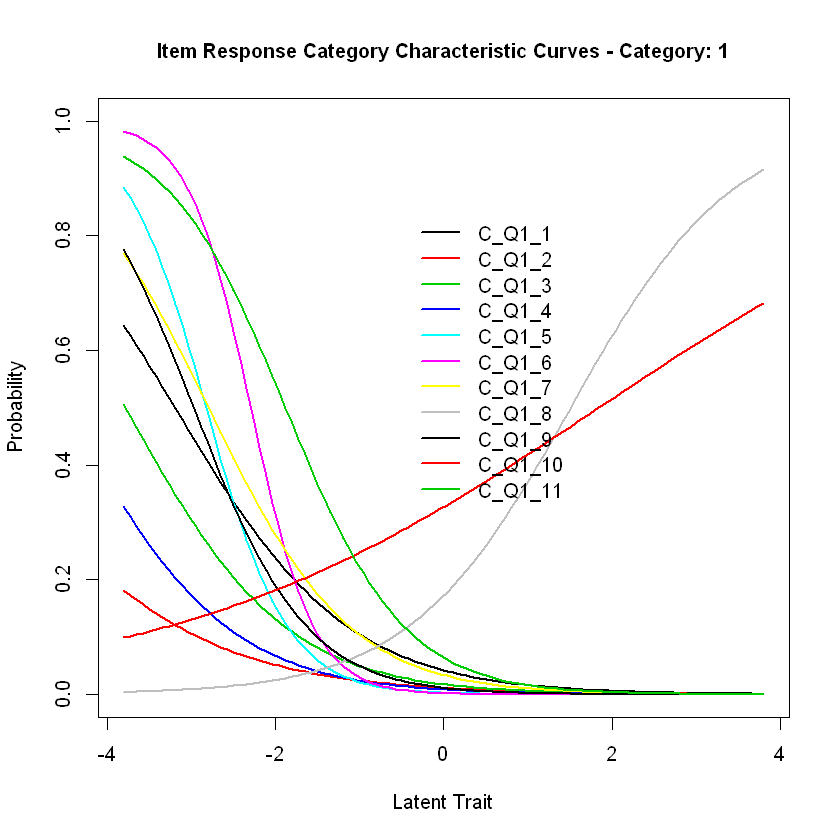

In [45]:
plot(fit2_C, category = 1, lwd = 2, cex = 1, legend = TRUE, cx = -0.5,
     cy = 0.85, xlab = "Latent Trait", cex.main = 1, cex.lab = 1,
     cex.axis = 1)